In [48]:
%matplotlib inline


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [50]:
diabetic_data = pd.read_csv("diabetic_data.csv",na_values="?", low_memory= False)
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [51]:
diabetic_data.shape

(101766, 50)

In [52]:
diabetic_data.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [53]:
diabetic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


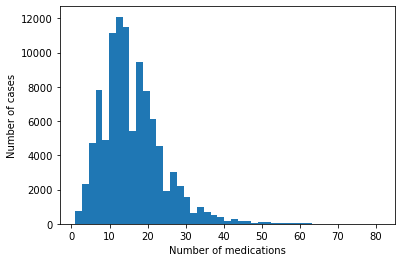

In [54]:
plt.hist(diabetic_data['num_medications'],bins = 45)
plt.xlabel('Number of medications')
plt.ylabel('Number of cases')
plt.show()

In [55]:
diabetic_data.diag_1.isna().sum()

21

In [56]:
diabetic_data.diag_2.isna().sum()

358

In [57]:
diabetic_data.diag_3.isna().sum()

1423

In [58]:
diabetic_data.A1Cresult.unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [59]:
diabetic_data.A1Cresult.value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [60]:
diabetic_data.metformin.value_counts(dropna=False)

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [61]:
columns_to_remove = diabetic_data.columns[
    (diabetic_data.columns.str.endswith('_id')) |
     (diabetic_data.columns.str.endswith('_nbr')) |
      (diabetic_data.columns.str.endswith('_code')) ]

In [62]:
diabetic_data = diabetic_data.drop(columns = columns_to_remove)  

In [63]:
# diabetic_data

In [64]:
diabetic_data.weight.value_counts(dropna=False)

NaN          98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [65]:
diabetic_data = diabetic_data.sample(5000)

In [66]:
diabetic_attributes = diabetic_data.drop(columns="readmitted")
diabetic_target = diabetic_data.readmitted


In [67]:
diabetic_attributes.shape

(5000, 43)

In [68]:
diabetic_target.shape

(5000,)

In [69]:
# One hot encoding
diabetic_attributes = pd.get_dummies(diabetic_attributes,drop_first=True)

In [70]:
diabetic_attributes.dtypes.unique()

array([dtype('int64'), dtype('uint8')], dtype=object)

In [71]:
diabetic_attributes.shape

(5000, 1228)

In [72]:
scaler = MinMaxScaler()

In [73]:
diabet_attributes_scaled = scaler.fit_transform(diabetic_attributes)

In [74]:
atttributes_train,atttributes_test, target_train,target_test =  train_test_split(diabet_attributes_scaled,diabetic_target)

In [75]:
atttributes_train.shape

(3750, 1228)

In [76]:
atttributes_test.shape

(1250, 1228)

In [77]:
target_train.shape

(3750,)

In [78]:
target_test.shape

(1250,)

In [79]:
model = LogisticRegression(C = 1e9, max_iter = 500)

In [80]:
model.fit(diabet_attributes_scaled,diabetic_target)

c:\Users\as\anaconda3\envs\baseREC\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000.0, max_iter=500)

In [81]:
model.score(diabet_attributes_scaled,diabetic_target)

0.6938

In [82]:
predictions = model.predict(diabet_attributes_scaled)

In [87]:
report = classification_report(diabetic_target,predictions)

In [88]:
print(report)

              precision    recall  f1-score   support

         <30       0.66      0.38      0.48       582
         >30       0.66      0.60      0.62      1775
          NO       0.72      0.83      0.77      2643

    accuracy                           0.69      5000
   macro avg       0.68      0.60      0.63      5000
weighted avg       0.69      0.69      0.68      5000

